In [9]:
from bs4 import BeautifulSoup
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

In [11]:
for dirname, _, filenames in os.walk('/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
# face bnb boxes from annotation file
def get_bnb_box(obj):
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)

    return [xmin, ymin, xmax, ymax]


# convert labels from annotation file to numbers
def get_label(obj):
    if obj.find('name').text == 'without_mask':
        return 0
    elif obj.find('name').text == 'mask_weared_incorrect':
        return 2
    else:
        return 1


def get_objects(img_id, file):
    print(file)
    with open(file, 'r') as f:
        data = f.read()
        soup_parser = BeautifulSoup(data, 'xml')
        objs = soup_parser.find_all('object')

        nums_of_objs = len(objs)

        bnb_boxes = []
        labels = []
        for i in objs:
            bnb_boxes.append(get_bnb_box(i))
            labels.append(get_label(i))

        bnb_boxes = np.array(bnb_boxes)
        labels = np.array(labels)
        img_id = np.array(img_id)

        result = {}
        result["boxes"] = bnb_boxes
        result["labels"] = labels

        return (result, nums_of_objs)

In [13]:
images = list(sorted(os.listdir('dataset/images')))
labels = list(sorted(os.listdir('dataset/annotations')))

In [14]:
objs = []
nums_of_objs = []
DIRNAME = os.path.dirname(os.path.abspath("__file__"))

for i in range(len(images)):
    label_file = 'maksssksksss' + str(i) + '.xml'
    label_path = os.path.join(DIRNAME + "/dataset/annotations/", label_file)
    obj, num_of_obj = get_objects(i, label_path)
    objs.append(obj)
    nums_of_objs.append(num_of_obj)

/Users/lubica.dubravcova/PycharmProjects/diplm/training/dataset/annotations/maksssksksss0.xml
/Users/lubica.dubravcova/PycharmProjects/diplm/training/dataset/annotations/maksssksksss1.xml
/Users/lubica.dubravcova/PycharmProjects/diplm/training/dataset/annotations/maksssksksss2.xml
/Users/lubica.dubravcova/PycharmProjects/diplm/training/dataset/annotations/maksssksksss3.xml
/Users/lubica.dubravcova/PycharmProjects/diplm/training/dataset/annotations/maksssksksss4.xml
/Users/lubica.dubravcova/PycharmProjects/diplm/training/dataset/annotations/maksssksksss5.xml
/Users/lubica.dubravcova/PycharmProjects/diplm/training/dataset/annotations/maksssksksss6.xml
/Users/lubica.dubravcova/PycharmProjects/diplm/training/dataset/annotations/maksssksksss7.xml
/Users/lubica.dubravcova/PycharmProjects/diplm/training/dataset/annotations/maksssksksss8.xml
/Users/lubica.dubravcova/PycharmProjects/diplm/training/dataset/annotations/maksssksksss9.xml
/Users/lubica.dubravcova/PycharmProjects/diplm/training/data

In [15]:
face_imgs = []
face_labels = []

for i in range(len(images)):
    image_file = 'maksssksksss' + str(i) + '.png'
    img_path = os.path.join(DIRNAME + "/dataset/images/", image_file)
    image = cv2.imread(img_path)
    for j in range(nums_of_objs[i]):
        bnb = (objs[i]["boxes"][j])
        image1 = image[bnb[1]:bnb[3], bnb[0]:bnb[2]]
        image1 = cv2.resize(image1, (224, 224))
        image1 = img_to_array(image1)
        image1 = preprocess_input(image1)
        face_imgs.append(image1)
        face_labels.append(objs[i]["labels"][j])

face_imgs = np.array(face_imgs, dtype="float32")
face_labels = np.array(face_labels)

In [16]:
len(face_labels)

4072

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


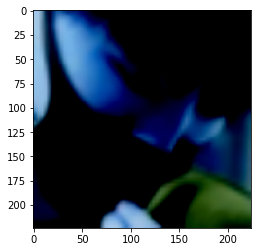

1


In [18]:
plt.imshow(face_imgs[4070])
plt.show()
print(face_labels[4070])

In [19]:
keys, counts = np.unique(face_labels, return_counts=True)
dict(zip(keys, counts))

{0: 717, 1: 3232, 2: 123}

In [32]:
def create_pickle(type_of_data, resize_num, data):
    path_to_pickle = '../pickle_files/' + type_of_data + "_resized_" + resize_num + '.pickle'
    print(path_to_pickle)
    pickle_out = open(path_to_pickle, 'wb')
    pickle.dump(data, pickle_out)
    pickle_out.close()

In [41]:
create_pickle("faces", "224", face_imgs)
create_pickle("facemask_labels", "224", face_labels)

../pickle_files/faces_resized_224.pickle
../pickle_files/facemask_labels_resized_224.pickle


In [42]:
faces = pickle.load(open('../pickle_files/faces_resized_224.pickle', 'rb'))
facemask_labels = pickle.load(open('../pickle_files/facemask_labels_resized_224.pickle', 'rb'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


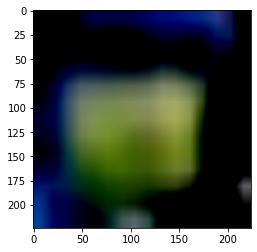

1


In [45]:
plt.imshow(faces[1002])
plt.show()
print(facemask_labels[1002])